In [18]:
from sprite_similarity.io import load_snapshot, load_asset
from sprite_similarity.preprocess import preprocess
from sprite_similarity.visualize import plot_pairs
from sprite_similarity.compare_pixels import get_mean_squared_errors
from sprite_similarity.utils import watchit

import json

import matplotlib.pyplot as plt

#### Set input data

In [19]:
path_assets = "./data"
path_data = "./data/exp_0/a"
# path_data = "./data/exp_state_1/f"
#path_data = "./data/exp_layout_4/d"
#path_data = "./data/exp_rendering_5/c"
ss_name = "5"

#### Load snapshot image and the parsed PIXI scene graph

In [20]:
screenshot, cor = load_snapshot(path_data, ss_name)

In [21]:
# parsed <canvas> objects representation
cor[-2:]

[{'bbox': (605, 523, 795, 713),
  'tbox': (380, 0, 570, 190),
  'angle': 0,
  'tile': None,
  'scaleMode': 1,
  'url': 'assets/viking_sheet_small.png'},
 {'bbox': (941, 320, 1280, 720),
  'tbox': (0, 0, 339, 400),
  'angle': 0,
  'tile': None,
  'scaleMode': 1,
  'url': 'assets/ship.png'}]

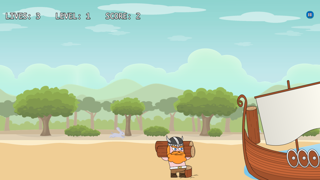

In [22]:
screenshot.resize((320, 180))

#### Preprocess images

In [23]:
# 8-bit RGBA color, i.e., pick values between 0-255
# for red (R), green (G), blue (B), and alpha (A)
bg_color = (0, 0, 0, 255)

# 
object_images = []
asset_images = []
asset_masks = []

lbls = ["rendered object", "oracle asset", "current layer mask"]

for obj in reversed(cor):            
    asset_img = load_asset(path_assets, obj)
    # object_img, asset_img, mask = watchit(preprocess, lbls)(screenshot, asset_img, obj, asset_masks, bg_color)
    object_img, asset_img, mask = preprocess(screenshot, asset_img, obj, asset_masks, bg_color)
    if (object_img is not None) and (asset_img is not None):
        object_images.append(object_img)
        asset_images.append(asset_img)

    if mask is not None:
        asset_masks.append(mask)

#### Visualize the results of preprocessing of the screenshot image

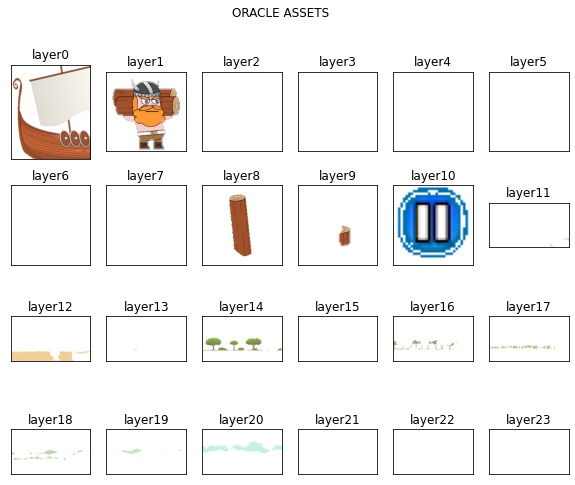

In [24]:
fig, axes = plt.subplots(4, 6, figsize=(10, 8))
for img, (idx, ax) in zip(asset_images, enumerate(axes.flatten())):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("layer{}".format(idx))
fig.suptitle("ORACLE ASSETS")
fig.show()

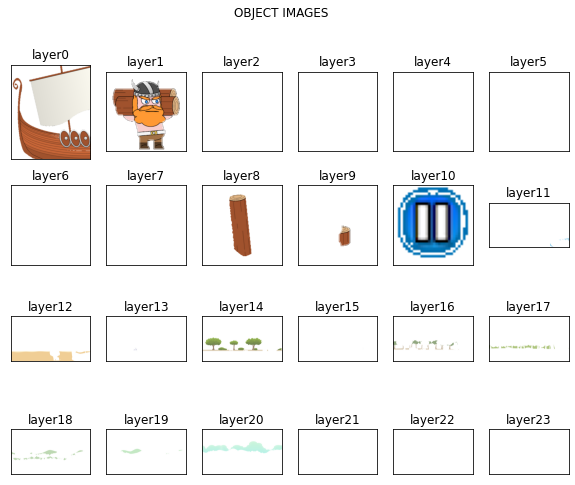

In [25]:
fig, axes = plt.subplots(4, 6, figsize=(10, 8))
for img, (idx, ax) in zip(object_images, enumerate(axes.flatten())):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("layer{}".format(idx))
fig.suptitle("OBJECT IMAGES")
fig.show()


#### Compare images

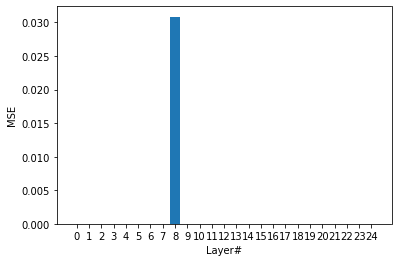

In [17]:
import numpy as np

plt.bar(x=range(len(asset_images)), height=get_mean_squared_errors(asset_images, object_images))
plt.xticks(np.arange(0,len(asset_images)))
plt.xlabel("Layer#")
plt.ylabel("MSE")
plt.show()

---